# Homework 5 - The Marvel Universe!

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import OrderedDict
from itertools import islice
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Let's import the datasets
**HERO-NETWORK:**\
It contains the network of heroes who have appeared together in the comics.

In [2]:
dfheros = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\hero-network.csv')

In [3]:
dfheros.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [4]:
dfheros.shape

(574467, 2)

**EDGES:**\
It contains two columns (hero, comic), indicating which comics the heroes appear in.

In [5]:
dfedges = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\edges.csv')

In [6]:
dfedges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [7]:
dfedges.shape

(96104, 2)

**NODES:**\
It contains two columns (node, type), indicating the nodes' name and its type (comic, hero).

In [8]:
dfnodes = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\nodes.csv')

In [9]:
dfnodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [10]:
dfnodes.shape

(19090, 2)

# QUESTION 1: DATA

## DATA PREPROCESSING
### 1)

**1.1**

"Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'" :

- The following command gets the string of heroes inside column 'hero1' (in dataset heros) that have a space in the last position: '  '. Once we have these heroes, we edit the string by deleting the space in the last position.

In [11]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == ' ':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]

- The following command does exactly the same of above but for the column 'hero2'

In [12]:
for i in range(len(dfheros.hero2)):
    if dfheros.hero2[i][-1] == ' ':
        dfheros.hero2[i]= dfheros.hero2[i][0:-1]

**1.2**

Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.

- We could do the same thing of above, but we noticed that in the column hero (dataset edges) we have heros which have in the last position a slash: '/'. So we can't just remove all '/' in last position in hero (dataset edges) otherwise we will end up in the opposite situation, i.e. heroes that have an extra '/' in the heroes dataset but don't have it in the edges dataset. Instead we should remove only the heroes that within hero1 (in dataset heros) have a slash in the last position, while in hero (dataset edges) they don't.

- However, to make things easier, we decided to remove the / in the last position in all heroes even those that are normally registered with the / in the last position (for example 8-BALL/ it is normally registered with the / in the last position because it has it in both the heros and edges datasets, but to make things easier we will remove the / even for 8-BALL/ in both dataset)

- The following query, therefore, removes the / in last position (to whoever has it) to all heroes in 'hero1' (dataset heros) and in 'hero' (dataset edges):

In [13]:
#for the dataset 'dfheros' in column 'hero1'
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == '/':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]
        
#for the dataset 'dfheros' in column 'hero2'
for i in range(len(dfheros.hero2)):
    if dfheros.hero2[i][-1] == '/':
        dfheros.hero2[i]= dfheros.hero2[i][0:-1]
        
#for the dataset 'dfedges' in column 'hero'
for i in range(len(dfedges.hero)):
    if dfedges.hero[i][-1] == '/':
        dfedges.hero[i]= dfedges.hero[i][0:-1]

**1.3**

The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'

We can see inside the dataset edges there are 1577 times the name 'SPIDER-MAN/PETER PARKER' in the column 'hero'.

In [14]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(1577, 2)

In order to avoid the problem of having two different name for the same hero in two different dataset, we decided to change inside the dataset edges, the name of the hero 'SPIDER-MAN/PETER PARKER' in 'SPIDER-MAN/PETER PAR'.

In [15]:
dfedges.hero = dfedges.hero.replace('SPIDER-MAN/PETER PARKER', 'SPIDER-MAN/PETER PAR')

Altought before were 1577 rows, now we can see that 'SPIDER-MAN/PETER PARKER' doesn't appear anymore.

In [16]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(0, 2)

### 2)

Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

- We can observe from the following cell that the rows we need to delete are 2232.

In [17]:
counter = 0
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        counter += 1
print('The number of total rows are: ', len(dfheros), "\nInstead, the number of rows that have the same hero in 'hero1' and 'hero2' are: ", counter)

The number of total rows are:  574467 
Instead, the number of rows that have the same hero in 'hero1' and 'hero2' are:  2232


- The following code iterates through the heros dataframe, if it encounters a row that has the same name in 'hero1' and 'hero2' then it deletes that row.

In [18]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        dfheros = dfheros.drop(i)

- Let's verify that 2232 rows have actually been deleted!


- Before we had a length of 574467, subtracting 2232 from it, we should obtain that the length of the dataframe is now equal to 572235:

In [19]:
len(dfheros)

572235

## GRAPHS SETUP
### 1)

- An edge between two heroes can be found if they have appeared in the same comic together. We assign a each edge a weight that is the reciprocal of how many times those two heroes have appeared in the same comic. Let's find all edges:

In [20]:
edges = dfheros.groupby(['hero1', 'hero2']).size().reset_index(name='weight')
edges.weight = round(1/ edges.weight,4)
G1 = nx.from_pandas_edgelist(edges, 'hero1', 'hero2', edge_attr = 'weight')

In [21]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to don't visualize the warnings
nx.info(G1)

'Graph with 6421 nodes and 167100 edges'

### 2)

- The following graph has all heroes and comics as nodes, taken from the "node" column of the "dfnodes" dataset. Here there will not be edges connecting two heroes or two comics together, but just edges connecting hero and comic. A hero is connected by a edge to the comic only if that hero has appeared in that specific comic.

In [22]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

# we add the type of each node, hero or comic (we will need in functionality 1)
for index, row in dfedges.iterrows():
    G2.add_node(row['hero'], type='hero')
    G2.add_node(row['comic'], type='comic')

In [23]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to hide the warnings
nx.info(G2)

'Graph with 19087 nodes and 96104 edges'

# QUESTION 2: BACKEND IMPLEMENTATION

## Functionality 1 - extract the graph's features

How we organize the work in this functionality:
- first created a function that returns the top N heroes
- created 8 different functions, one for each request
- created a final function that groups all the previous functions

**Top N heroes**: The top N heroes who have appeared in the most number of comics.

In [31]:
def topNsuperherosGraph(G, N=None):
    
    G_sorted_bydeg = sorted(G, key=lambda x: G.degree(x), reverse=True) 
    # This sorts our nodes in descending order based on their degree value.
    
    if N != None: 
        # If we set the N in the function then we have to return a different graph, if we don't set the N then
        # the function will return the same graph.
        if G == G2:
            # If we have both the 'comic' nodes and the 'hero' nodes we have to create another graph.
            G_top_N_def = nx.Graph()
            # This will be helpful to check what node is a 'hero' node.
            hero_nodes = [node for node in G.nodes(data=True) if node[1]['type'] == 'hero']
            for i in G_sorted_bydeg:
                if i not in [i[0] for i in hero_nodes]:
                    G_sorted_bydeg.remove(i)
            G_top_N_def.add_nodes_from(G_sorted_bydeg[:N]) # We add our top N heros nodes.
            edges_top_N_superheros = []
            for i in G_sorted_bydeg[:N]:
                edges_top_N_superheros.append(list(G.edges(i)))
            for i in edges_top_N_superheros:
                G_top_N_def.add_edges_from(i) 
                # This adds the edges (so also the 'comic' nodes) connecting the top N heros
                # to the comics in which they appear.
            return G_top_N_def
        else:
            # This will work if we have the G1 graph, which is an only heros graph. So we don't have to check if a node
            # is a 'hero' node or a 'comic' node.
            
            # In this case we create a copy of the graph so we don't directly modify the graph we input.
            G_top_N_def = G.copy()
            for i in list(G_top_N_def.nodes()):
                if i not in G_sorted_bydeg[:N]:
                    G_top_N_def.remove_node(i) 
                    # We directly remove the nodes that aren't in the top N superheros list without then removing the edges
                    # that connect said top N heros.
            return G_top_N_def
    else:
        # If we don't set the N, then it'll return the full initial graph.
        return G

#### F1.1 The number of nodes in the network (if type 2, report for both node types)

- The following function takes as input the graph and the type of graph, if the type of graph is 1, it returns the number of total nodes, if instead the type of graph is 2, it returns the number of total nodes that refer to a hero and the number of total nodes that refer to a comic.

In [32]:
def nodes(graph, graph_type):
    # if graph type is equal to 1, return the total number of nodes
    if graph_type == 1:
        return (f"The graph has {graph.number_of_nodes()} nodes")
        
    #if instead graph type is equal to 2, count all nodes that refer to a hero and all nodes that refer to a comic and return them.
    else:   
        attributes = nx.get_node_attributes(graph, 'type')
        count_hero = list(attributes.values()).count('hero')
        count_comic = list(attributes.values()).count('comic')
        return (f"The graph has {count_hero} nodes referring to heros and {count_comic} nodes referring to comics.")

#### F1.2 The number of collaborations of each superhero with the others (only if type 1)

- The following function takes as input the graph, the type of graph and the number of top N heroes to be considered and outputs the number of collaborations of each hero with the others.

In [33]:
def collaborations(graph, graph_type, N= None):
    # If graph type is equal to 2 we can't compute it.
    if graph_type == 2:
        return ("Sorry, I can't compute the number of collaborations of each superhero with the others for type 2 graphs, only for type 1 graphs.")
        
    else:
        
        # Create a new empty dictionary
        node_degrees = {}
    
        # Compute the degree of each node and add it to the dictionary
        for node in graph:
            degree = graph.degree(node)
            node_degrees[node] = degree
            
        # Sort the dictionary by its values
        sorted_dict = dict(sorted(node_degrees.items(), key=lambda x: x[1], reverse=True))
        
        
        # So far we have created an ordered dictionary where we have heroes as keys and as values the number of collaborations
        # they have. How ever we want a dictionary sorted by top N heroes. Let's do it!
        
        
        # Create a new empty dictionary
        dizionario_filtrato = {}
        
        # Go through the list of top N heroes and add hero after hero to the dictionary, with its corresponding value of collaborations.
        top_heroes = topNsuperherosGraph(G1, N)
        node_list = []
        for node in top_heroes.nodes():
            node_list.append(node)
        for elemento in node_list:
            if elemento in sorted_dict:
                dizionario_filtrato[elemento] = sorted_dict[elemento]
                
        # Return the first N element of the dictionary (which are the top N heroes)  
        return dict(islice(dizionario_filtrato.items(), N))

**F1.3 The number of heroes that have appeared in each comic (only if type 2)**

- The following function takes as input the graph, the type of graph and an integer N and returns as output an ordered dictionary of length N, in which there are comics as key and as values the number of heroes appeared in that comic. 


- The decision to give N as input (which in the final function 'features' actually indicates the number of top N heroes) is due to the fact that taking the whole dictionary (and not just the first N elements), the function returns a dictionary of length 12651, and in terms of visualization for the final function it wasn't confortable.

In [34]:
def heros_per_comic(graph, graph_type, N= None):
    # If graph type is equal to 1 we can't compute it.
    if graph_type == 1:
        return ("Sorry, I can't compute the number of heroes that have appeared in each comic for type 1 graphs, only for type 2 graphs.")
    
    else:
        # Create a dictionary that has the node as the key and the type of that node as the value (comic or hero)
        attributes = nx.get_node_attributes(graph, 'type')
        
        # Crea filtered_d, ovvero un dizionario che ha come elementi solo nodi di tipo 'comic'
        filtered_d = {k: v for k, v in attributes.items() if v != 'hero'}
        
        # Create a new empty dictionary
        final_d = {}
        
        # For each key in filtered_d (which would all be nodes of type comic), calculate the degree and add to the final_d 
        # dictionary that node as the key and the degree as the value
        for i in filtered_d:
            final_d[i] = graph.degree(i)
            
        # Sort the dictionary by its values
        sorted_d = dict(sorted(final_d.items(), key=lambda item: item[1], reverse = True))
        
        # Returns the first N elements of the dictionary
        return dict(islice(sorted_d.items(), N))

**F1.4 The network's density**

- In a network, density refers to the number of edges in the network compared to the total number of possible edges. A network with a high density has a large number of edges, while a network with a low density has few of them.


- To compute the density of a network, we need to use the following formula:
  - Density = (Number of edges in the network) / (Total number of possible edges)

In [35]:
def density(graph):
    # Compute the total number of nodes
    num_edges = graph.number_of_edges()
    # Compute the total number of edges
    num_possible_edges = (graph.number_of_nodes() * (graph.number_of_nodes() - 1)) / 2
    # Compute the density
    density = num_edges / num_possible_edges
    return round(density,4)

**F1.5 The network's degree distribution**

- The distribution degree of a graph is a measure of how often different degrees of nodes appear within the graph. The following function takes the graph as input and returns the degree distribution, i.e. a dictionary whose keys are the degrees of the nodes of the graph and as values it has the number of nodes within the graph that have that degree.

In [36]:
def distribution(graph):
  # Create an empty dictionary to count the number of nodes with each degree
  degree_count = {}

  # Iterate over the nodes of the graph
  for node in graph.nodes():
    # Get the degree of the current node using the degree method of NetworkX
    degree = graph.degree(node)

    # If the degree is not yet in the dictionary, add a new entry
    if degree not in degree_count:
        degree_count[degree] = 0

    # Increment the counter for the current degree
    degree_count[degree] += 1

  # Sort the dictionary by keys (the degrees of the nodes) in ascending order
  degree_count = sorted(degree_count.items(), key=lambda x: x[0])

  # Return the sorted dictionary
  return dict(degree_count)

**F1.6 The average degree of the network**

- The following function takes a graph as input and returns the average degree of that graph. The average degree would be the sum of all the degrees of the nodes, divided by how many nodes there are within the graph.

In [37]:
def average_degre(graph):
    # Initialize the total degree counter to zero
    total_degree = 0
  
    # Iterate over the nodes of the graph and add the degree of every node to the total degree counter
    for node in graph:
        total_degree += len(graph[node])
  
    # Divide the total degree by the number of nodes in the graph and return the rounded result
    return round(total_degree / len(graph))

**F1.7 The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)**

In [38]:
def get_hubs(graph):
    # Find the distribution of degrees in the graph
    distribution_degree = distribution(graph)
    c = 0
    q = 0

    # Iterate over the degree distribution
    for i, j in distribution_degree.items():
        # If the cumulative count is less than 95th percentile set q as the last degree of iteration. This means that after this
        # for loop q will be the degree such that the nodes of the graph having degree > q are the network's hubs
        if c <= (95 * (graph.number_of_nodes()) / 100):
            c += j
            q = i

    # Get the degree for each node in the graph
    nodes_degree = dict(graph.degree())
    hubs = []
    # Iterate over the degree of each node
    for i, j in nodes_degree.items():
        # If the degree of the node is greater than q means that is a hub node, so add it to the list of hubs
        if j > q:
            hubs.append(i)

    # Return the list of hubs
    return hubs

**F1.8 Whether the Network is sparse or dense**

In [39]:
def dense_or_sparse(graph):
    # if the density graph is < 0.5 return Sparse, otherwise return Dense
    if density(graph) < 0.5:
        return 'Sparse'
    else:
        return 'Dense'

### Final function of FUNCIONALITY 1

In [40]:
def features(graph, graph_type, N = None):
    if (graph_type != 1) & (graph_type != 2):
        return 'The type of graph entered is no correct.'
    else:
        nodi = nodes(graph, graph_type)
        n_collaborations = collaborations(graph, graph_type, N)
        n_heros_each_comic = heros_per_comic(graph, graph_type, N)
        densità = density(graph)
        network_degree_distribution = distribution(graph)
        average_degree = average_degre(graph)
        hubs = get_hubs(graph)
        dense_sparse = dense_or_sparse(graph)
    print('1)', nodi)
    print('*'*120)
    print('2)', n_collaborations)
    print('*'*120)
    print('3) The number of heroes that have appeared in each comic are: ', n_heros_each_comic)
    print('*'*120)
    print('4) The density of the graph is ', densità)
    print('*'*120)
    print('5) The network degree distribution is: ', network_degree_distribution)
    print('*'*120)
    print('6) The average degree of the network is ', average_degree)
    print('*'*120)
    print('7) The hubs of the graph are: ', hubs)
    print('*'*120)
    print('8) The graph is ', dense_sparse)

**EXAMPLE**

In [34]:
features(G1, 1, 10)

1) The graph has 6421 nodes
************************************************************************************************************************
2) {'CAPTAIN AMERICA': 1903, 'SCARLET WITCH/WANDA': 1322, 'THING/BENJAMIN J. GR': 1416, 'IRON MAN/TONY STARK': 1521, 'THOR/DR. DONALD BLAK': 1289, 'BEAST/HENRY &HANK& P': 1265, 'MR. FANTASTIC/REED R': 1377, 'WOLVERINE/LOGAN': 1368, 'HUMAN TORCH/JOHNNY S': 1361, 'SPIDER-MAN/PETER PAR': 1737}
************************************************************************************************************************
3) The number of heroes that have appeared in each comic are:  Sorry, I can't compute the number of heroes that have appeared in each comic for type 1 graphs, only for type 2 graphs.
************************************************************************************************************************
4) The density of the graph is  0.0081
***********************************************************************************************

## Functionality 2 - Find top superheroes!

We tried building and/or manipulating some given algorithms for the centrality measures. We could only do 3 out of 4 functions from scratch (DegreeCentrality, PageRank and ClosenessCentrality), meanwhile for the Betweenness we use the built-in function in networkx. These functions will then be implemented in our main function.

**Degree Centrality**

In [35]:
def degreeCentrality(G):
    output_list = []
    N = len(G.nodes())
    degrees = G.degree()
    for i in degrees:
        output_sol = i[1]/(N-1)
        output = i[0], output_sol
        output_list.append(output)
    return output_list

**PageRank**

In [436]:
def pageRank(G):
    if len(G) == 0:
        return {}
    if not G.is_directed():
        D = G.to_directed()
    else:
        D = G
    W = nx.stochastic_graph(D, weight = 'weight')
    N = W.number_of_nodes()
    x = dict.fromkeys(W, 1.0 / N)
    p = dict.fromkeys(W, 1.0 / N)
    dweights = p
    dnodes = [n for n in W if W.out_degree(n, weight = 'weight') == 0.0]
    for i in range(100):
        xlast = x
        x = dict.fromkeys(xlast.keys(), 0)
        dsum = 0.85*sum(xlast[n] for n in dnodes)
        for n in x:
            for number in W[n]:
                x[number] += 0.85*xlast[n] * W[n][number]['weight']
            x[n] += dsum * dweights[n] + (0.15)*p[n]
        err = sum([abs(x[n] - xlast[n]) for n in x])
        if err < N*(1.0e-6):
            return x

**Closeness Centrality**

In [437]:
def closenessCentrality(G):
    path_length = nx.single_source_shortest_path_length
    nodes = G.nodes()
    closeness_centrality = {}
    for n in nodes:
        sp = path_length(G,n)
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1:
            closeness_centrality[n] = (len(sp)-1.0) / totsp
            s = (len(sp)-1.0) / ( len(G) - 1 )
            closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    return closeness_centrality

From the exercise request, we understand that we need the data for only the top N superheros. Sometimes this N is given, but it should be set to None, which means that we need to consider the whole graph. If we set up a specific N number, then we need to build a graph which takes only the top N superheros with their data.

Our main function is now ready to be set up.

In [438]:
def centralityMeasures(G, node, measure, N=None):
    """
    INPUT:
    'G' is our graph data
    'Node' is the given node (which can be both a comic node or a hero node)
    'Measure' is the centrality measure chosen by the user. It can either be: 'Betweenness', 'PageRank',
              'ClosenessCentrality' or 'DegreeCentrality'
    'N' is the number of top heros that we consider for our calculations
    
    OUTPUT:
    First number is the given node's centrality value.
    Second list is the metric's value over the considered graph.
    """
    # We create the top N heros graph with the function we created before.
    G_top_N = topNsuperherosGraph(G, N)
    
    if node in list(G_top_N.nodes()):
        # We check if the node we chose is actually in the top N heros list or is a comic connected to a top N hero.
        if measure == 'Betweenness':
            centrality = nx.betweenness_centrality(G_top_N)
            return centrality[node], centrality
        elif measure == 'PageRank':
            centrality = pageRank(G_top_N)
            return centrality[node], centrality
        elif measure == 'ClosenessCentrality':
            centrality = closenessCentrality(G_top_N)
            return centrality[node], centrality
        elif measure == 'DegreeCentrality':
            centrality = degreeCentrality(G_top_N)
            # The degree centrality function returns a different type of list so we cannot
            # use 'centrality[node]' because it doesn't work. 
            # This is what we do to get the centrality for the node instead:
            for i in range(len(centrality)):
                if centrality[i][0] == node:
                    return centrality[i][1], centrality
    else:
        return 'Node not available'

### Betweenness Centrality

In [472]:
bet_centrality = centralityMeasures(G1, 'SPIDER-MAN/PETER PAR', 'Betweenness', 20)

Let’s run an example for the betweenness centrality for the graph 1 with N=20, also getting the centrality for node ‘SPIDER-MAN/PETER PAR’. We notice that all the nodes have the same centrality values: this makes sense since the Betweenness centrality for each node is the number of the shortest paths that pass through the node, and these nodes are all mutually connected. For the last 2 nodes the betweenness was too low to print any number.

In [473]:
bet_centrality

(0.0003248862897985705,
 {'ANGEL/WARREN KENNETH': 0.0003248862897985705,
  'CAPTAIN AMERICA': 0.0003248862897985705,
  'CYCLOPS/SCOTT SUMMER': 0.0003248862897985705,
  'HAWK': 0.0003248862897985705,
  'SHE-HULK/JENNIFER WA': 0.0003248862897985705,
  'THING/BENJAMIN J. GR': 0.0003248862897985705,
  'THOR/DR. DONALD BLAK': 0.0003248862897985705,
  'COLOSSUS II/PETER RA': 0.0003248862897985705,
  'BEAST/HENRY &HANK& P': 0.0003248862897985705,
  'MR. FANTASTIC/REED R': 0.0003248862897985705,
  'ANT-MAN/DR. HENRY J.': 0.0003248862897985705,
  'HULK/DR. ROBERT BRUC': 0.0003248862897985705,
  'STORM/ORORO MUNROE S': 0.0003248862897985705,
  'WONDER MAN/SIMON WIL': 0.0003248862897985705,
  'HUMAN TORCH/JOHNNY S': 0.0003248862897985705,
  'HERCULES [GREEK GOD]': 0.0003248862897985705,
  'SPIDER-MAN/PETER PAR': 0.0003248862897985705,
  'MARVEL GIRL/JEAN GRE': 0.0003248862897985705,
  'IRON MAN/TONY STARK': 0.0,
  'WOLVERINE/LOGAN': 0.0})

In [474]:
bet_centralities = bet_centrality[1]
avg_centrality_bet = sum(bet_centralities.values())/len(bet_centralities)
centrality_node_bet = bet_centrality[0]

### PageRank

In [475]:
pr_centrality = centralityMeasures(G1, 'SPIDER-MAN/PETER PAR', 'PageRank', 20)

Let’s run an example for the pagerank centrality for the graph 1 with N=20, also getting the centrality for node ‘SPIDER-MAN/PETER PAR’. The pagerank centrality quantifies how important a node is, so the value will be higher if the node is linked to other important nodes or if it’s highly linked. Looking at the overall graph centralities and the centrality for the chosen node, we can see that there are no high values.

In [476]:
pr_centrality

(0.0478774393821525,
 {'ANGEL/WARREN KENNETH': 0.05400066408541315,
  'CAPTAIN AMERICA': 0.028538636998911716,
  'CYCLOPS/SCOTT SUMMER': 0.0485751003051934,
  'HAWK': 0.05660401427396757,
  'SHE-HULK/JENNIFER WA': 0.046839821940995875,
  'THING/BENJAMIN J. GR': 0.03441989060295252,
  'THOR/DR. DONALD BLAK': 0.04425937717539627,
  'COLOSSUS II/PETER RA': 0.06663120307743224,
  'BEAST/HENRY &HANK& P': 0.03743839798851418,
  'MR. FANTASTIC/REED R': 0.03951450382021051,
  'ANT-MAN/DR. HENRY J.': 0.060643238342412344,
  'HULK/DR. ROBERT BRUC': 0.04878209072952566,
  'STORM/ORORO MUNROE S': 0.05989994136310842,
  'WONDER MAN/SIMON WIL': 0.055321691729485846,
  'HUMAN TORCH/JOHNNY S': 0.03724234154636447,
  'HERCULES [GREEK GOD]': 0.06597056469381696,
  'SPIDER-MAN/PETER PAR': 0.0478774393821525,
  'MARVEL GIRL/JEAN GRE': 0.07580153024521297,
  'IRON MAN/TONY STARK': 0.04448913159008936,
  'WOLVERINE/LOGAN': 0.04715042010884425})

In [477]:
pr_centralities = pr_centrality[1]
avg_centrality_pr = sum(pr_centralities.values())/len(pr_centralities)
centrality_node_pr = pr_centrality[0]

### Closeness Centrality

In [484]:
cl_centrality = centralityMeasures(G1, 'SPIDER-MAN/PETER PAR', 'ClosenessCentrality', 20)

Let’s run an example for the closeness centrality for the graph 1 with N=20, also getting the centrality for node ‘SPIDER-MAN/PETER PAR’. We notice most of the graph’s values are equal to 1, but it makes sense if we think that closeness centrality, quite literally, quantifies how central a node is so how close it is to all the other nodes, and these nodes are all mutually connected.

In [485]:
cl_centrality

(1.0,
 {'ANGEL/WARREN KENNETH': 1.0,
  'CAPTAIN AMERICA': 1.0,
  'CYCLOPS/SCOTT SUMMER': 1.0,
  'HAWK': 1.0,
  'SHE-HULK/JENNIFER WA': 1.0,
  'THING/BENJAMIN J. GR': 1.0,
  'THOR/DR. DONALD BLAK': 1.0,
  'COLOSSUS II/PETER RA': 1.0,
  'BEAST/HENRY &HANK& P': 1.0,
  'MR. FANTASTIC/REED R': 1.0,
  'ANT-MAN/DR. HENRY J.': 1.0,
  'HULK/DR. ROBERT BRUC': 1.0,
  'STORM/ORORO MUNROE S': 1.0,
  'WONDER MAN/SIMON WIL': 1.0,
  'HUMAN TORCH/JOHNNY S': 1.0,
  'HERCULES [GREEK GOD]': 1.0,
  'SPIDER-MAN/PETER PAR': 1.0,
  'MARVEL GIRL/JEAN GRE': 1.0,
  'IRON MAN/TONY STARK': 0.95,
  'WOLVERINE/LOGAN': 0.95})

In [486]:
cl_centralities = cl_centrality[1]
avg_centrality_cl = sum(cl_centralities.values())/len(cl_centralities)
centrality_node_cl = cl_centrality[0]

### Degree Centrality

In [487]:
deg_centrality = centralityMeasures(G1, 'SPIDER-MAN/PETER PAR', 'DegreeCentrality', 20)

Let’s run an example for the degree centrality for the graph 1 with N=20, also getting the centrality for node ‘SPIDER-MAN/PETER PAR’. The degree centrality (this one is standardized, so it’s divided by N-1) counts how many links are connected to a node. Since, as we said before, the graph we’re considering has nodes that are all mutually connected, we understand why most of our responses are equal to 1.

In [488]:
deg_centrality

(1.0,
 [('ANGEL/WARREN KENNETH', 1.0),
  ('CAPTAIN AMERICA', 1.0),
  ('CYCLOPS/SCOTT SUMMER', 1.0),
  ('HAWK', 1.0),
  ('SHE-HULK/JENNIFER WA', 1.0),
  ('THING/BENJAMIN J. GR', 1.0),
  ('THOR/DR. DONALD BLAK', 1.0),
  ('COLOSSUS II/PETER RA', 1.0),
  ('BEAST/HENRY &HANK& P', 1.0),
  ('MR. FANTASTIC/REED R', 1.0),
  ('ANT-MAN/DR. HENRY J.', 1.0),
  ('HULK/DR. ROBERT BRUC', 1.0),
  ('STORM/ORORO MUNROE S', 1.0),
  ('WONDER MAN/SIMON WIL', 1.0),
  ('HUMAN TORCH/JOHNNY S', 1.0),
  ('HERCULES [GREEK GOD]', 1.0),
  ('SPIDER-MAN/PETER PAR', 1.0),
  ('MARVEL GIRL/JEAN GRE', 1.0),
  ('IRON MAN/TONY STARK', 0.9473684210526315),
  ('WOLVERINE/LOGAN', 0.9473684210526315)])

In [489]:
deg_centralities = deg_centrality[1]
sum_deg_centralities = 0
for i in range(len(deg_centralities)):
    sum_deg_centralities += deg_centralities[i][1]
avg_centrality_deg = sum_deg_centralities/len(deg_centralities)
centrality_node_deg = deg_centrality[0]

## Functionality 3 - Shortest ordered Route

In [265]:
def shortestOrderedRoute(G, h, h_1, h_n, N = None):

    G_top_N = topNsuperherosGraph(G, N)
    
    # If there's no path between h_1 and h_n then stop the function
    if not nx.has_path(G_top_N, h_1, h_n):
        return 'There is no such path'
    
    else:
        
        visit_heros = [h_1] + h + [h_n] # List of heros the function needs to visit
        path = [visit_heros[0]] # Starting node
    
        for i in range(len(visit_heros) - 1): 
            shortestwalk = nx.shortest_path(G_top_N, visit_heros[i], visit_heros[i+1]) 
            # Get shortest path between all the nodes in the list of heros
            # that we need to visit
            path = path + shortestwalk[1:]
            # 'Path' becomes a list of the first node in the visit_heros list
            # and the elements from index 1 to end of the shortestwalk output

        comic_nodes = [node for node in G.nodes(data=True) if node[1]['type'] == 'comic']
        # We get only the 'comic' nodes
        only_comics = [] # We make a list of only the comics that we need to read to go from h_1 to h_n without any hero in between.
        for j in path:
            if j in [i[0] for i in comic_nodes]:
                if j not in only_comics:
                    # This appends only the unique comic names, without any repetition
                    only_comics.append(j)
        return path, only_comics

**EXAMPLE**

In [301]:
h_ex3 = ['VISION', 'CAPTAIN AMERICA']
ex3 = shortestOrderedRoute(G2, h_ex3, 'SPIDER-MAN/PETER PAR', 'IRON MAN/TONY STARK', 100)

In [302]:
print('The shortest ordered route from', ex3[0][0], 'to', ex3[0][-1], 'is :', ex3[0])

The shortest ordered route from SPIDER-MAN/PETER PAR to IRON MAN/TONY STARK is : ['SPIDER-MAN/PETER PAR', 'A 118', 'VISION', 'A 10', 'CAPTAIN AMERICA', "A '00", 'IRON MAN/TONY STARK']


In [304]:
print('The comics the user has to read in order to get from', ex3[0][0], 'to', ex3[0][-1], 'are :', ex3[1])

The comics the user has to read in order to get from SPIDER-MAN/PETER PAR to IRON MAN/TONY STARK are : ['A 118', 'A 10', "A '00"]


## Functionality 4 - Disconnecting Graphs

Since the function for the point 2.4 only asks how many links are required to disconnect the graph into two subgraphs, the function's output will be a number.

In [281]:
def disconnectingGraph(G, heroA, heroB, N = None):
    
    G_top_N = topNsuperherosGraph(G, N)
    G_copy = G_top_N.copy()
    start = len(G_top_N.edges()) # Number of edges before removing them
    
    while nx.has_path(G_copy, heroA, heroB) == True: 
        # It keeps going until there's no path between heroA and heroB
        
        shortpath = list(nx.all_shortest_paths(G_copy, heroA, heroB))
        # It returns the list of all the shortest paths between the two nodes.
        
        remove_edges = []
            
        for i in shortpath:
            if len(i) == 2:
                G_copy.remove_edge(heroA, heroB)
            else:
                middle = len(i)//2
                app = i[middle], i[middle+1] # Middle node and the one next to it
                remove_edges.append(app)
                G_copy.remove_edges_from(set(remove_edges))
    return start - len(G_copy.edges()) # Count of edges that we removed

In [282]:
# Example
disconnectingGraph(G1, 'VISION', 'SPIDER-MAN/PETER PAR', 100)

98

## Functionality 5 - Extracting Communities

**F5.1 The minimum number of edges that should be removed to form communities**

In [308]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [309]:
def girvan_newman(graph):
    
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)
    edges_removed = 0

    # continue removing edges until there is more than one connected component
    while sg_count == 1:
        # remove an edge from the graph
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        # update the connected components
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
        # increment the count of removed edges
        edges_removed += 1

    # return the number of removed edges
    return edges_removed

**F5.2 A list of communities, each containing a list of heroes that belong to them.**

In [310]:
def list_communities(graph):
    girvan_newman(graph)
    
    # find the connected components in the graph
    communities = nx.connected_components(graph)

    node_groups = []

    # add each community to a empty list called node_groups in order to have a nested list where every sublist i referred to a 
    #single community
    for i in communities:
        node_groups.append(list(i))

    # return the list of node groups
    return node_groups

**F5.3 If the Hero_1 and Hero_2 belongs to the same community**

In [311]:
def heroes_same_communities(graph, hero1, hero2):
    communities = list_communities(graph)
    for i in communities:
        if hero1 in i and hero2 in i:
            return ('The hero', hero1, 'is in the same communities of the hero', hero2)
    return ('The hero', hero1, 'is NOT in the same communities of the hero', hero2)

### Final function of FUNCIONALITY 5

In [312]:
def functionality5(graph, N, hero1, hero2):
    
    top_heroes = topNsuperherosGraph(graph,N)
    
    min_edges = girvan_newman(top_heroes)
    
    communities = list_communities(top_heroes)
    
    same_communities = heroes_same_communities(top_heroes, hero1, hero2)

    print ('1) The minimum number of edges that should be removed to form communities are ', min_edges)
    print ('*'*120)
    print("2) The heroes that are found within the communities are :", communities)
    print ('*'*120)
    print('3)', same_communities)
    

**EXAMPLE**

In [754]:
functionality5(G1, 10, 'CAPTAIN AMERICA', 'IRON MAN/TONY STARK')

1) The minimum number of edges that should be removed to form communities are  9
************************************************************************************************************************
2) The heroes that are found within the communities are : [['CAPTAIN AMERICA'], ['SCARLET WITCH/WANDA', 'MR. FANTASTIC/REED R', 'BEAST/HENRY &HANK& P', 'THOR/DR. DONALD BLAK', 'SPIDER-MAN/PETER PAR', 'THING/BENJAMIN J. GR', 'WOLVERINE/LOGAN', 'IRON MAN/TONY STARK', 'HUMAN TORCH/JOHNNY S']]
************************************************************************************************************************
3) ('The hero', 'CAPTAIN AMERICA', 'is NOT in the same communities of the hero', 'IRON MAN/TONY STARK')


# QUESTION 3: FRONTED IMPLEMENTATION

## Visualization 1 - Visualize some features of the network 

**V1.1  A table containing the following general information about the graph:**

- Number of nodes in the network
- Density of the network
- Average degree of the network
- Whether the network is sparse or dense

In [732]:
def table(graph):
    
    #Let's create a dataframe in which there are 4 columns that correspond to the 4 requests    
    dataframe = pd.DataFrame([{'nodes' : graph.number_of_nodes(), 'densità' : density(graph),
                  'average_degree' : average_degre(graph), 'sparse_dense' : dense_or_sparse(graph)}])
    
    return dataframe.set_index(['nodes', 'densità', 'average_degree', 'sparse_dense'])

**FOR THE FIRST GRAPH**

In [733]:
table(G1)

,,,
nodes,densità,average_degree,sparse_dense
6421,0.0081,52,Sparse


**FOR THE SECOND GRAPH**

In [734]:
table(G2)

,,,
nodes,densità,average_degree,sparse_dense
19087,0.0005,10,Sparse


**V1.2  A table that lists the network's hubs**

In [735]:
def table_hubs(graph):
    # Initialize empty dictionary to store hubs nodes and their degree
    d = {}
    
    # Iterate over list of hubs nodes returned by get_hubs function written in functionality 1
    for i in get_hubs(graph):
        # Add entry to dictionary with hub node as key and its degree in the graph as value
        d[i] = graph.degree(i)
    
    # Create Pandas DataFrame from dictionary with keys as index
    df = pd.DataFrame.from_dict(d, orient='index', columns=['colonna_valori'])
    
    # Reset index and change column names
    df.reset_index(inplace=True)
    df.columns = ['hero/comic', 'degree']
    
    return df

**FOR THE FIRST GRAPH**

In [731]:
table_hubs(G1)

,hero/comic,degree
0,ANGEL/WARREN KENNETH,1070
1,ANT-MAN II/SCOTT HAR,410
2,AURORA/JEANNE-MARIE,406
3,BLACK PANTHER/T'CHAL,711
4,BLACK WIDOW/NATASHA,920
...,...,...
315,"DE LA FONTAINE, CONT",261
316,MAGMA/AMARA AQUILLA,199
317,"JAMESON, MARLA MADIS",251
318,"WATSON, ANNA",277


**FOR THE SECOND GRAPH**

In [730]:
table_hubs(G2)

,hero/comic,degree
0,COC 1,111
1,Q 14,27
2,ABOMINATION/EMIL BLO,45
3,H2 278,53
4,SWII 7,41
...,...,...
922,ZABU,163
923,ZARAN/MAXIMILLIAN ZA,24
924,"ZARRKO, ARTHUR",37
925,ZEUS,44


**V1.3 A plot depicting the number of collaborations of each hero in descending order (if the graph is type 1)**

- Inside the 'collaborations' function we have given as input N = 3, so the graph is displayed only for the first top 3 heroes. This choice is due to the fact that an N > 3 made the heroes' names all stick together (in the x-axis of the graph), so in terms of display it was not the best choice.

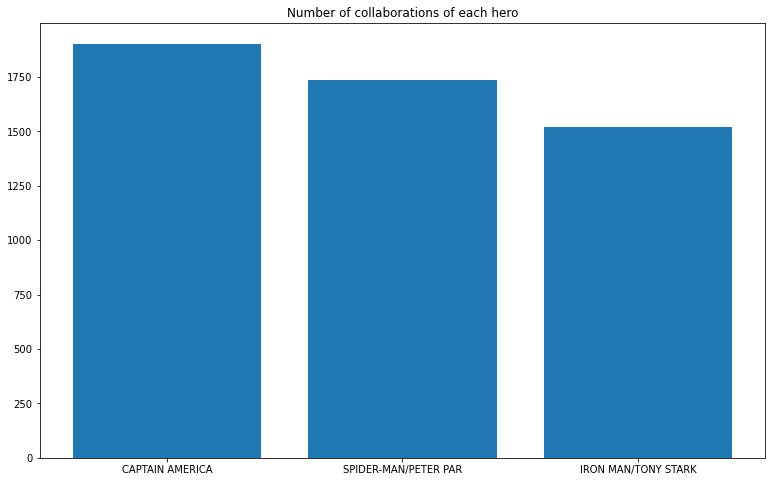

In [325]:
# We create a list of tuples, where inside each tuple is the name of the hero and the number of collaborations it has made.
plt.figure(figsize=(13,8))
plt.title('Number of collaborations of each hero')
plot_sort_hero = sorted(collaborations(G1,1,3).items(), key=lambda x: x[1], reverse = True)

height = [t[1] for t in plot_sort_hero]
bars = [t[0] for t in plot_sort_hero]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

**V1.4 A plot depicting the number of heroes who appeared in each comic, sorted in descending order (if the graph is type 2)**

- Same reason of above, inside the 'heros_per_comic' function we have given as input N = 9, so the graph is displayed only for the first top 9 comics (top in terms of number of heroes appeared). This choice is due to the fact that an N > 9 made the comics' names all stick together (in the x-axis of the graph), so in terms of display it was not the best choice.

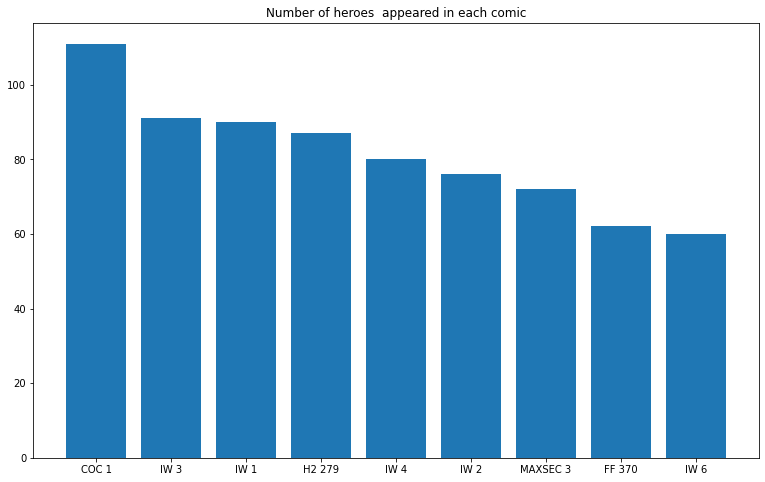

In [327]:
# We create a list of tuples, where inside each tuple is the name of the comic and the number of heroes appeared in that comic.
plt.figure(figsize=(13,8))
plt.title('Number of heroes  appeared in each comic')
plot_sort_comic = sorted(heros_per_comic(G2, 2, 9).items(), key=lambda x: x[1], reverse = True)

height = [t[1] for t in plot_sort_comic]
bars = [t[0] for t in plot_sort_comic]
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

**V1.5 A plot depicting the degree distribution of the network**

- We decided to make two graphs that visualize the degree distribution for each graph:
  - Histogram
  - Scatter plot

In [271]:
def histogram(graph):
    # Let's recall the distribution function and save it inside plot_v5_G1
    plot_v5 = distribution(graph)

    # Extract the dictionary keys and values into two separate lists
    keys = list(plot_v5.keys())
    values = list(plot_v5.values())

    # We decided to create the histogram choosing 40 bins
    plt.hist(values, bins=40, align='left')
    plt.show()

In [272]:
def scatter_plot(graph):
    plot_v5 = distribution(graph)
    
    # Extract the dictionary keys and values into two separate lists
    keys = list(plot_v5.keys())
    values = list(plot_v5.values())

    plt.scatter(keys, values)
    plt.show()

- Let's visualize the histogram for the first graph (G1)

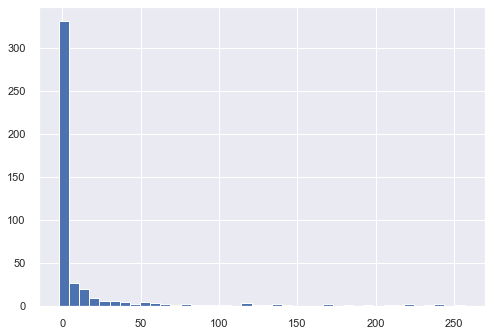

In [273]:
histogram(G1)

- Let's visualize the scatter plot for the first graph (G1)

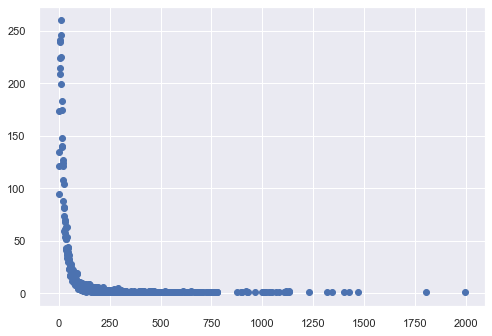

In [277]:
scatter_plot(G1)

- Let's visualize the histogram for the second graph (G2)

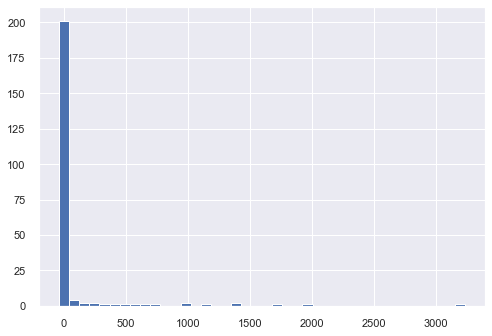

In [279]:
histogram(G2)

- Let's visualize the scatter plot for the second graph (G2)

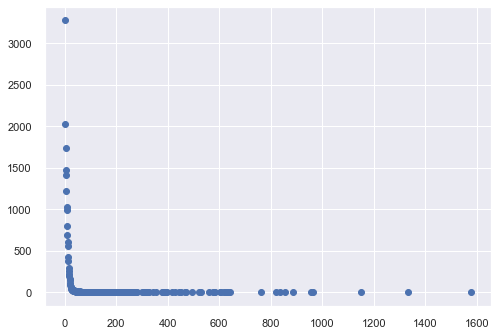

In [280]:
scatter_plot(G2)

## Visualization 2 - Visualize centrality measures

In [510]:
df_vis2 = pd.DataFrame() # We create a new dataframe with all of our needed values.

In [511]:
names_centralities = ['Betweenness', 'PageRank', 'Closeness', 'DegreeCentrality']
avg_centralities = [avg_centrality_bet, avg_centrality_pr, avg_centrality_cl, avg_centrality_deg]
centralities_node = [centrality_node_bet, centrality_node_pr, centrality_node_cl, centrality_node_deg]

In [512]:
df_vis2['Centrality'] = names_centralities

In [513]:
df_vis2['Avg Centrality'] = avg_centralities

In [514]:
df_vis2['Nodes centrality'] = centralities_node

In [515]:
df_vis2

,Centrality,Avg Centrality,Nodes centrality
0,Betweenness,0.000292,0.000325
1,PageRank,0.050000,0.047877
2,Closeness,0.995000,1.000000
3,DegreeCentrality,0.994737,1.000000


This dataframe helps us with the visualization of all the centrality measures required for Functionality 2. Keep in mind that we chose Graph 1 with N=20 and node = ‘SPIDER-MAN/PETER PAR’. The results appear quite high for closeness and degree centrality, which makes sense because we’re talking about a graph that has (majority) of nodes connected with each other. Meanwhile, the average pagerank centrality is a lower value because every node in the graph, being a small graph and interconnected, is considered ‘important’, and the same goes for the betweenness. If we get a higher N number these results will probably change. The results will also change if we use Graph 2 instead of Graph 1, since the top N superheroes graph will not only get the top N superheroes but also the comics in which they appear. Anyway, this dataframe is a nice way to visualize every centrality measure (both the average over the whole graph and the chosen node’s centrality value) and to compare.

## Visualization 3 - Visualize the shortest-ordered route

**Print the comics in the shortest walk in order**

In [273]:
h = ['STORM/ORORO MUNROE S','THOR/DR. DONALD BLAK']

In [274]:
vis3 = shortestOrderedRoute(G2, h, 'SPIDER-MAN/PETER PAR','HAWK', 100)

In [277]:
print('The comics you need to read to get from', vis3[0][0], 'to', vis3[0][-1], 'are:', vis3[1])

The comics you need to read to get from SPIDER-MAN/PETER PAR to HAWK are: ['A3 10', 'A 10', 'A 1']


Here we printed the list of the comics we need to read to get from the start node to the end node. The output only gives us the unique set of names of comics so we don't get any repetitions.

**Plot the graph and identify the nodes and edges that appear in the shortest walk (please put an identifier on each edge in the shortest walk to determine the order that we should have the walk)**

In [ ]:
def shortest_path_graph(G,h,h_1, h_n, N):
    plt.figure(figsize=(15,15))
    G_top_N = topNsuperherosGraph(G, 100)
    result = shortestOrderedRoute(G, h, h_1, h_n, N )
    
    route = result[0]
    G_top_N = nx.DiGraph()
    for i in range(len(route)-1):
        G_top_N.add_edge(route[i],route[i+1])
      
    pos = nx.spring_layout(G_top_N)

    nx.draw_networkx_nodes(G_top_N, pos=pos, nodelist=[h_1],
                           node_color='green', label='Initial hero', node_size = 800, alpha = 0.5)
    nx.draw_networkx_nodes(G_top_N, pos=pos, nodelist=[h_n],
                           node_color='red', label='End hero', node_size = 800, alpha = 0.5)
    nx.draw_networkx_nodes(G_top_N, pos=pos, nodelist=h,
                           node_color='pink', label='Heroes you must pass through', node_size = 800, alpha = 0.5)
    nx.draw_networkx_nodes(G_top_N, pos=pos, nodelist= result[1],
                           node_color='cyan', label='Comics to read', node_size = 800, alpha = 0.5)
    
    plt.tight_layout()
    plt.legend(scatterpoints = 1, markerscale = 0.4)
    color_map = ['green' if node == h_1 else 'red' if node == h_n else 'pink' if node in h else 'cyan' for node in G_top_N]
    
    nx.draw(G_top_N, with_labels = True, node_color=color_map, alpha = 0.7, pos = pos, 
                          arrowsize=15, connectionstyle='arc3,rad=0.05', node_size = 800)

- **EXAMPLE 1**

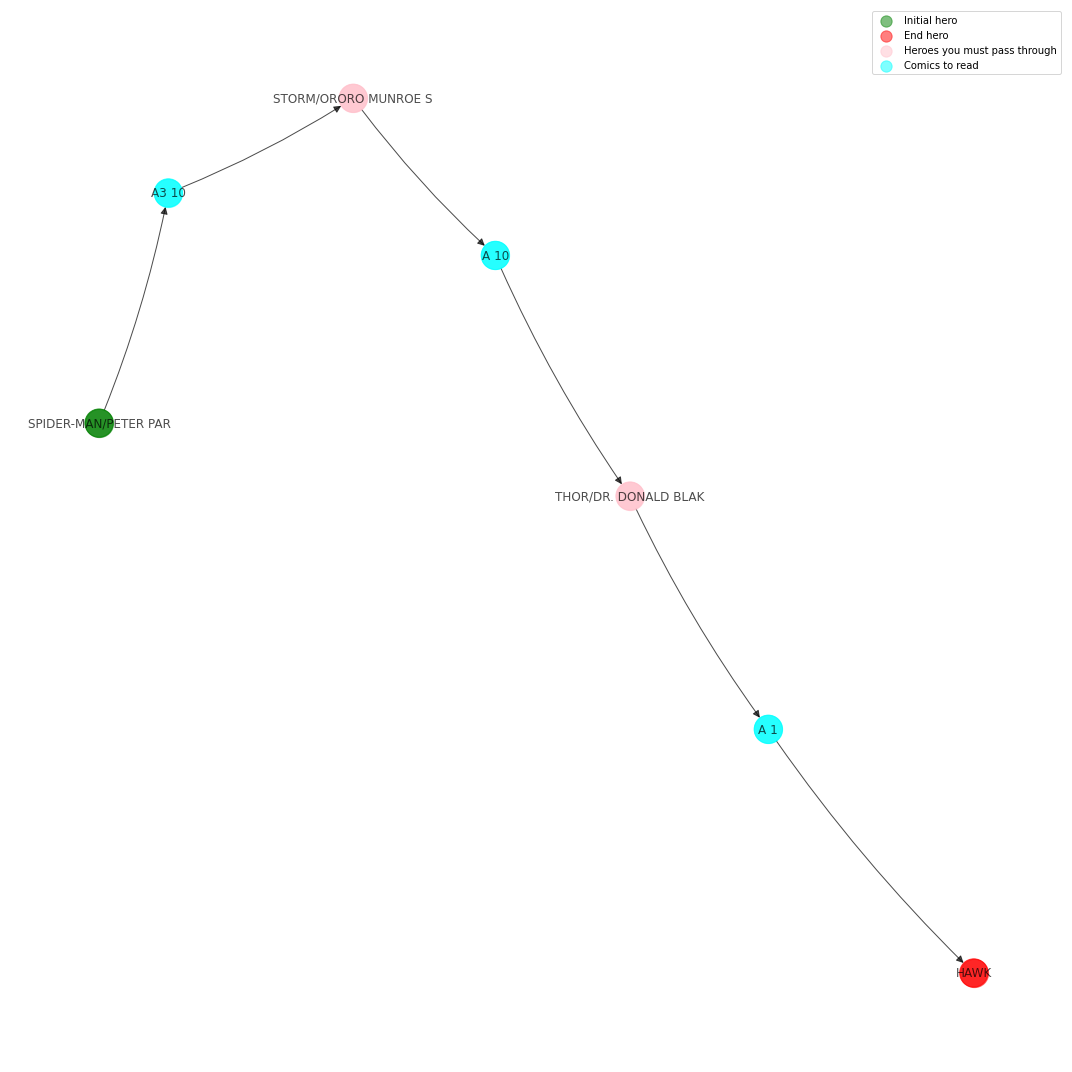

In [278]:
shortest_path_graph(G2,h,'SPIDER-MAN/PETER PAR','HAWK', 100)

- **EXAMPLE 2**

In [279]:
h2 = ['CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 'THING/BENJAMIN J. GR', 'SCARLET WITCH/WANDA', 'BEAST/HENRY &HANK& P', 'DR. STRANGE/STEPHEN', 'WATSON-PARKER, MARY', 'DAREDEVIL/MATT MURDO', 'HAWK', 'VISION', 'CYCLOPS/SCOTT SUMMER', 'WASP/JANET VAN DYNE']

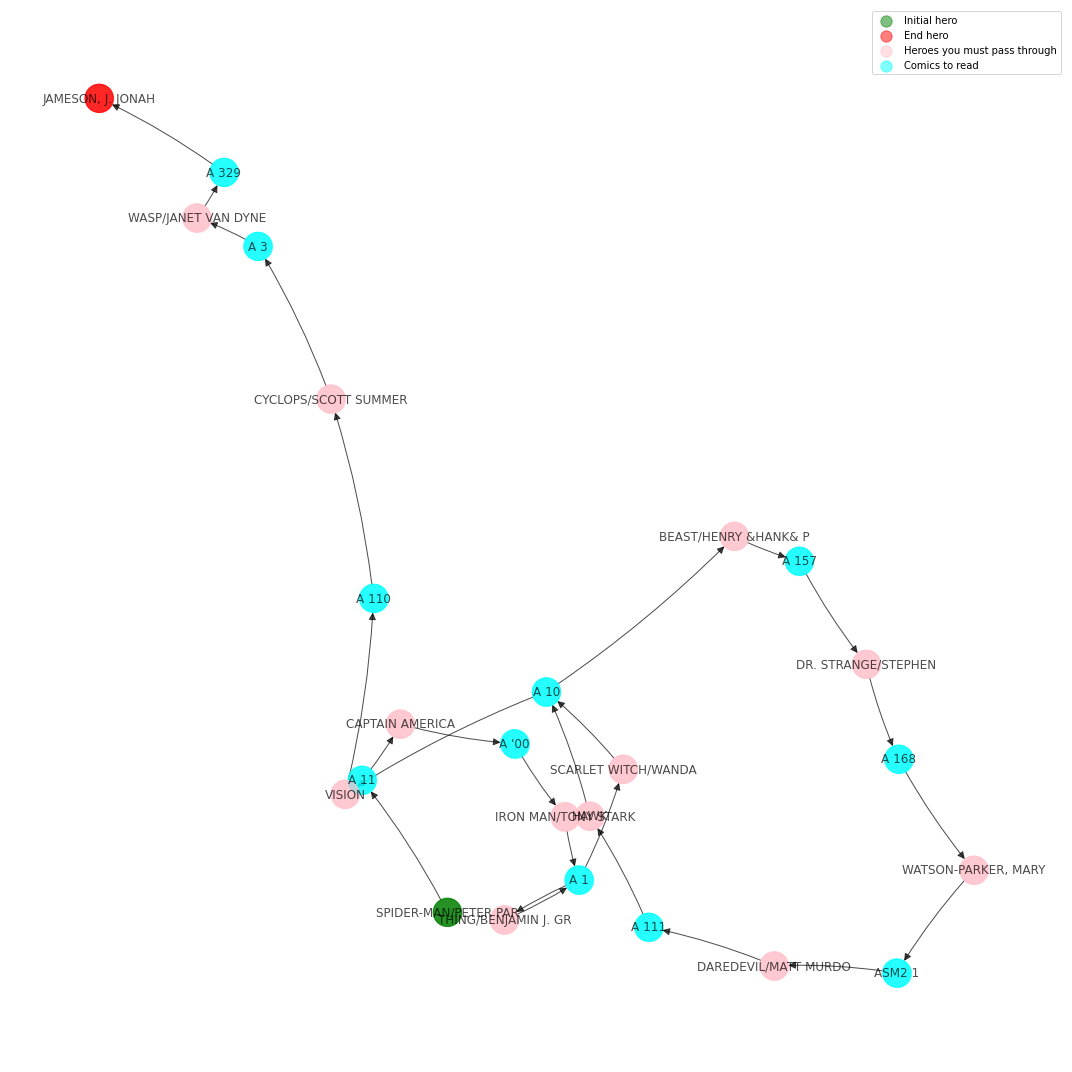

In [280]:
shortest_path_graph(G2,h2,'SPIDER-MAN/PETER PAR', 'JAMESON, J. JONAH', 20)

## Visualization 4 - Visualize the disconnected graph

**V4.1 Print the number of the links that should be disconnected**

In [283]:
# Example
vis4 = disconnectingGraph(G1, 'CAPTAIN AMERICA', 'SPIDER-MAN/PETER PAR', 10)
print('Minimum number of links required to disconnect the graph is :', vis4)

Minimum number of links required to disconnect the graph is : 9


**V4.2 Plot the original graph**

In [565]:
G_top_N = topNsuperherosGraph(G1,10)

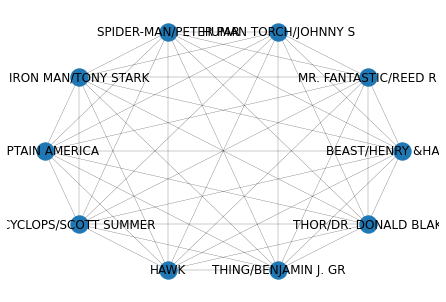

In [810]:
pos = nx.shell_layout(G_top_N)
nx.draw(G_top_N, pos=pos, with_labels = True, width = 0.2)

**V4.3 Plot the graph after removing the links and identify the two nodes**

In [570]:
def disconnectingGraphVisualization(G, heroA, heroB, N = None):
    
    G_top_N = topNsuperherosGraph(G, N)
    G_copy = G_top_N.copy()
    start = len(G_top_N.edges()) # Number of edges before removing them
    
    while nx.has_path(G_copy, heroA, heroB) == True: 
        # It keeps going until there's no path between heroA and heroB
        
        shortpath = list(nx.all_shortest_paths(G_copy, heroA, heroB))
        # It returns the list of all the shortest paths between the two nodes.
        
        remove_edges = []
            
        for i in shortpath:
            if len(i) == 2:
                G_copy.remove_edge(heroA, heroB)
            else:
                middle = len(i)//2
                app = i[middle], i[middle+1] # Middle node and the one next to it
                remove_edges.append(app)
                G_copy.remove_edges_from(set(remove_edges))
    return G_copy # Count of edges that we removed

In [571]:
fun_4_graph = disconnectingGraphVisualization(G1, 'CAPTAIN AMERICA', 'SPIDER-MAN/PETER PAR', 10)

In [574]:
node_colors = ['red' if n in ['SPIDER-MAN/PETER PAR', 'CAPTAIN AMERICA'] else 'blue' for n in list(fun_4_graph.nodes())]
node_sizes = [200 if n in ['SPIDER-MAN/PETER PAR', 'CAPTAIN AMERICA'] else 50 for n in list(fun_4_graph.nodes())]

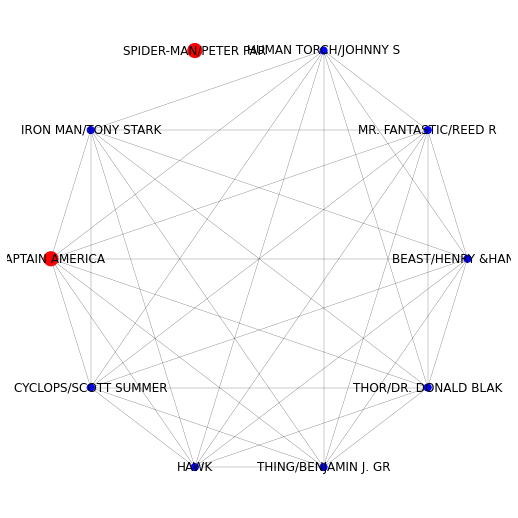

In [809]:
plt.figure(figsize=(7,7))
pos = nx.shell_layout(G_top_N)
nx.draw(fun_4_graph, with_labels=True, pos = pos, node_size = node_sizes, node_color = node_colors, width = 0.2)

## Visualization 5 - Visualize the communities

For the visualization we have decided to take the graph containing only the top 10 heroes, in order to have a better visualization. So, in the following cell we call 'G_visualization' a graph containing only the first top 10 heroes.

In [313]:
G_visualization_original = topNsuperherosGraph(G1, 10)

**V5.1 Print the number of links that should be removed to have the communities**

In [314]:
G_visualization_community = topNsuperherosGraph(G1, 10)
girvan_newman(G_visualization_community)

9

**V5.2 A table depicting the communities and the heroes that belong to each community**

In [342]:
lista_com = list_communities(G_visualization_community)

data = []
c = 1
for i in lista_com:
    for j in i:
        # Add a tuple to the list        
        data.append((j, c))
    c += 1

# We transform the list into a dataframe
df = pd.DataFrame(data, columns=['hero', 'community'])
df

,hero,community
0,CAPTAIN AMERICA,1
1,BEAST/HENRY &HANK& P,2
2,SCARLET WITCH/WANDA,2
3,WOLVERINE/LOGAN,2
4,IRON MAN/TONY STARK,2
5,THOR/DR. DONALD BLAK,2
6,THING/BENJAMIN J. GR,2
7,MR. FANTASTIC/REED R,2
8,SPIDER-MAN/PETER PAR,2
9,HUMAN TORCH/JOHNNY S,2


So in this graph where we are considering only the first 10 top heroes, once the communities have been formed it can be seen that there are two communities, the first contains only Captain America, the second all the others heroes.

**V5.3 Plot the original graph**

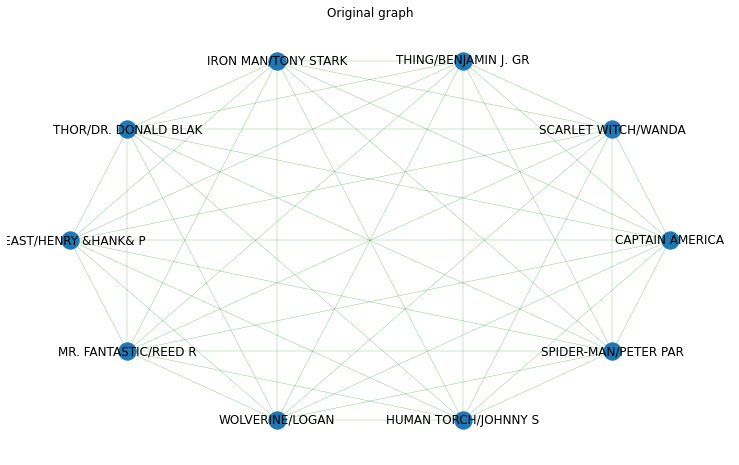

In [840]:
plt.figure(figsize=(13,8))
plt.title('Original graph')
pos = nx.circular_layout(G_visualization_original)
nx.draw(G_visualization_original, with_labels=True,pos = pos, edge_color='green', width=0.2)
plt.show()

**V5.4 Plot the graph showing the communities in the network**

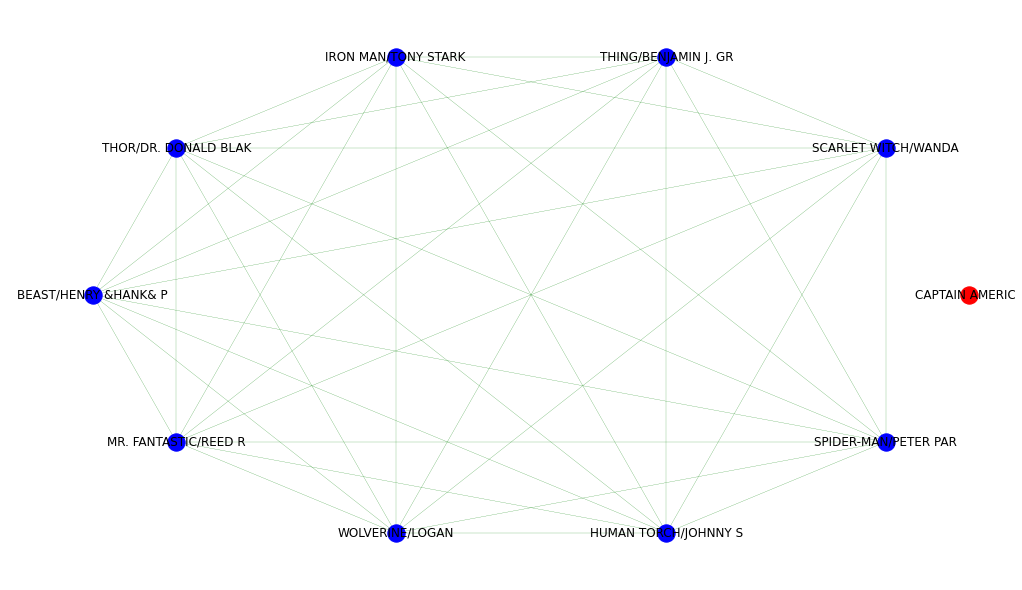

In [316]:
plt.figure(figsize=(14,8))
connected_subgraphs = [G_visualization_community.subgraph(c).copy() for c in nx.connected_components(G_visualization_community)]
pos = nx.circular_layout(G_visualization_community)


colors = ['red', 'blue']
for i, g in enumerate(connected_subgraphs):
    nx.draw(g, with_labels=True, pos = pos, width = 0.2, edge_color='green', node_color=colors[i % len(colors)])

plt.show()

**V5.5 Plot the final graph and identify the community/communities of Hero_1 and Hero_2**

In [388]:
hero1 = 'CAPTAIN AMERICA'
hero2 = 'IRON MAN/TONY STARK'

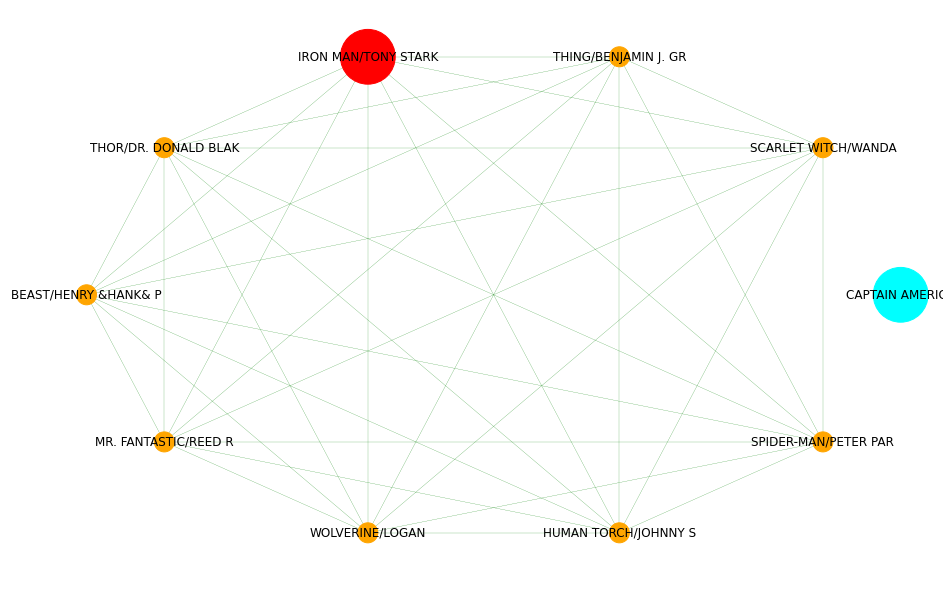

In [389]:
connected_subgraphs = [G_visualization_community.subgraph(c).copy() for c in nx.connected_components(G_visualization_community)]

color_map = []
size = []
for node in G_visualization_community.nodes:
    if node in lista_com[0]:
        if node == hero1:
            size.append(3000)
            color_map.append('cyan')
        else:
            size.append(400)
            color_map.append('orange')
    if node in lista_com[1]:
        if node == hero2:
            size.append(3000)
            color_map.append('red')
        else:
            size.append(400)
            color_map.append('orange')

plt.figure(3,figsize=(13,8))
pos = nx.circular_layout(G_visualization_community)
nx.draw(G_visualization_community, node_color=color_map, node_size = size, with_labels=True, edge_color='green', width=0.2, pos = pos)
plt.show()

# QUESTION 6: ALGORITHMIC QUESTION

In [77]:
def password(directions):
    # This first part will be helpful for len(directions) equal to 5 and 6.
    # If the number of UNIQUE directions, for each type of direction, exceeds 2 then it's not possible because
    # that wouldn't fit in the 3x3 grid.
    count_D = 0
    count_L = 0
    count_R = 0
    count_U = 0
    for i in directions:
        if i == 'D':
            count_D += 1
        elif i == 'L':
            count_L += 1
        elif i == 'R':
            count_R += 1
        elif i == 'U':
            count_U += 1
    # We notice that for the len(directions) > 6 the solution would always be 0, because it's impossible
    # to find a password that has 7 different unique directions without them ever intersecting. So we study every possible
    # length from 1 to 6.
    if len(directions) == 1 or len(directions) == 2:
        return 9
    elif len(directions) == 3:
        return 15
    elif len(directions) == 4:
        if directions[0] == directions[2] and directions[1] == directions[3]:
            return 1
        # Examples: 'DRDR', 'LULU', 'DLDL'.
        # These have only one option (each 'step' has the length of 1 segment)
        # because the grid wouldn't fit more than 2 segments.
        else:
            return 5
        # Examples: 'DRDL', 'URDR', 'DLUL', 'RULD', 'DLUR', 'LDRU'
    elif len(directions) == 5:
        if count_D > 2 or count_L > 2 or count_R > 2 or count_U > 2:
            return 0
        if directions == directions[::-1]:
            return 8
        # Examples: 'DRURD', 'LDRDL', 'RULUR'
        # For this option we have 8 different options: this is because if the string is equal to its reverse then it creates
        # a sort of 'S'. So we have 8 different options, counting if we decide to start from the top (for examples) or
        # from the middle.
        else:
            if directions[0] == directions[-1]:
                return 4
            # Examples: 'DLURD', 'LDRUL', 'ULDRU'
            # These directions have 4 possibilities without the line intersecting.
            else:
                return 2
            # Examples: 'DLDRU', 'LDRUR', 'RDRUL'.
            # Two different options for these directions. Mostly because we can only have either 1 or 2 directions of
            # length = 2 segments, because then the 'busy' points, so the points where a segment has already passed through
            # would be 8 (and 9, in these cases, is impossible).
    elif len(directions) == 6:
        if count_D > 2 or count_L > 2 or count_R > 2 or count_U > 2:
            return 0
        else:
            if directions[0] != directions[4] and directions[1] == directions[5]:
                return 2
            # Example: 'DRULUR' = first D can either be 1 segment long or 2 segments long.
            elif directions[0] != directions[4] and directions[1] != directions[5] and directions[0:1] == directions[2:3]:
                return 1
            elif directions[0] == directions[4] and directions[1] != directions[5]:
                return 1
            elif directions[0] != directions[4] and directions[1] != directions[5] and directions[0:1] != directions[2:3]:
                return 3
            # Examples: 'DRDRUL' = 1 option, 'RDLDLU' = 3 options, 'DRULUR' = 2 options.
            elif directions[0] == directions[4] and directions[1] == directions[5]:
                return 0
    elif len(directions) > 6:
        return 0

**Let's do some examples..**

In [78]:
directions = 'DRDL'
password(directions)

5

In [79]:
directions = 'DRURD'
password(directions)

8

In [80]:
directions = 'DRU'
password(directions)

15

In [81]:
directions = 'DRULDR'
password(directions)

0